In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

mechanical_embedding = "/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/ml_mm/OUTPUT_0/trajectory_0.dcd"
mm = "'/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/mm_sol/rep1/OUTPUT_0/trajectory_0.dcd'"
u = mda.Universe('/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/mm_sol/rep1/OUTPUT_0/tmp_fes_ml_openmm/topology.pdb', mechanical_embedding)
u

/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


<Universe with 3015 atoms>

In [3]:
dih1 = [14, 8, 3, 4]
dih2 = [7, 6, 4, 3]

dih1_sel = u.select_atoms('bynum %d %d %d %d' % tuple(dih1))
dih2_sel = u.select_atoms('bynum %d %d %d %d' % tuple(dih2))

# Calculate the dihedral angle
dih1_angles = Dihedral([dih1_sel]).run().angles[:, 0]
dih2_angles = Dihedral([dih2_sel]).run().angles[:, 0]

/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/MDAnalysis/analysis/dihedrals.py:337: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


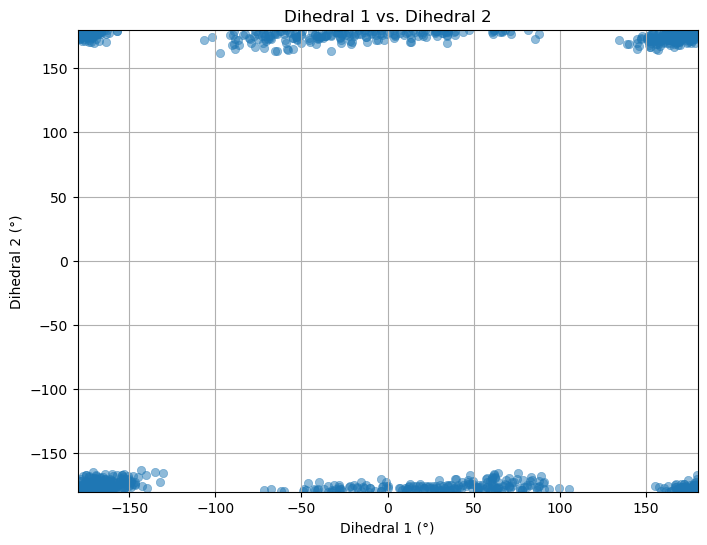

In [4]:


# Convert to Pandas DataFrame
df = pd.DataFrame({"Dihedral 1": dih1_angles, "Dihedral 2": dih2_angles})

# Seaborn 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Dihedral 1"], y=df["Dihedral 2"], alpha=0.5, edgecolor=None)
plt.xlabel("Dihedral 1 (°)")
plt.ylabel("Dihedral 2 (°)")
plt.title("Dihedral 1 vs. Dihedral 2")
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid()
plt.show()


/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/MDAnalysis/analysis/dihedrals.py:337: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


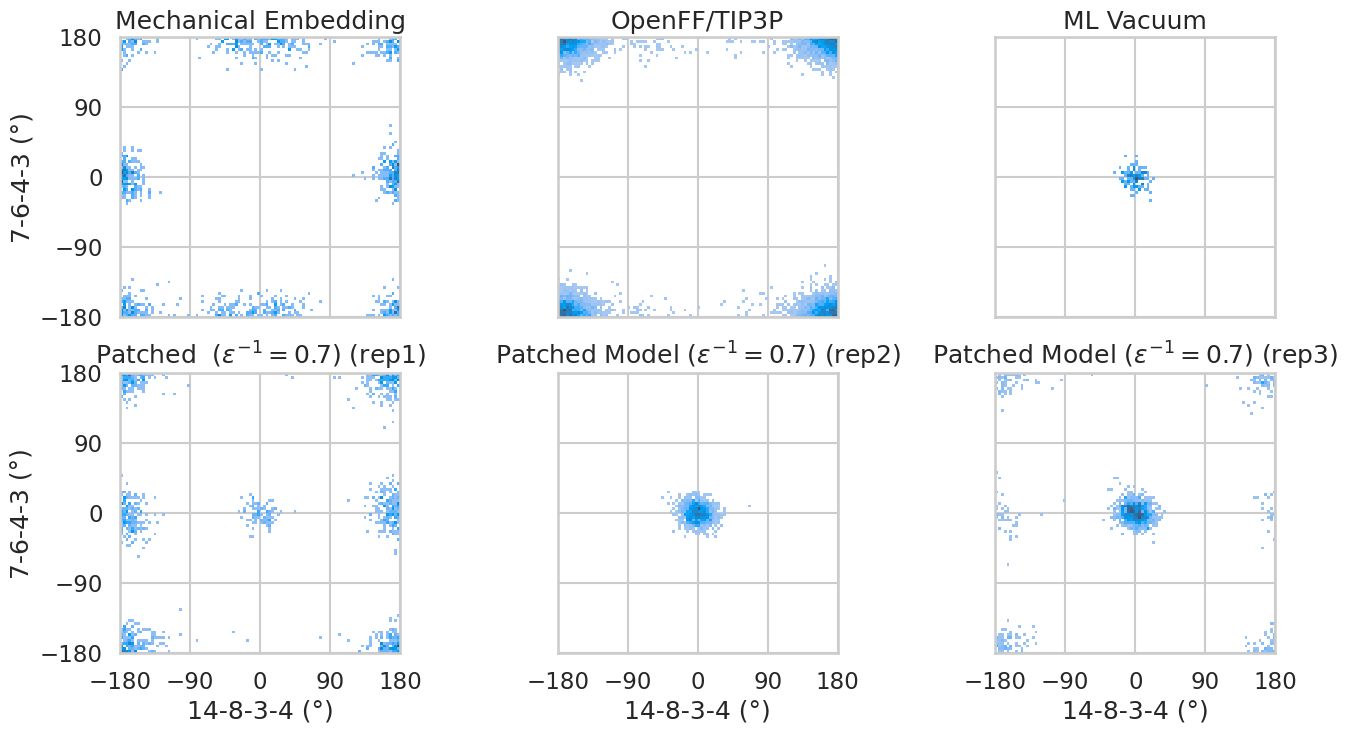

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define topology file
topology = "/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/mm_sol/rep1/OUTPUT_0/tmp_fes_ml_openmm/topology.pdb"

# Define trajectory files
mechanical_embedding = "/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/ml_mm/OUTPUT_0/trajectory_0.dcd"
mm = "/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/mm_sol/rep1/OUTPUT_0/trajectory_0.dcd"
vacuum = "/home/joaomorado/trajectory_0.dcd"
me1 = "/scratch1/joao/tip3p_final/TIP3P_transferable/rep1.dcd"
me2 = "/scratch1/joao/tip3p_final/TIP3P_transferable/rep2.dcd"
me3 = "/scratch1/joao/tip3p_final/TIP3P_transferable/rep3.dcd"

# Define dihedral atom indices (PDB-based numbering)
dih1 = [14+1, 8+1, 3+1, 4+1]
dih2 = [7+1, 6+1, 4+1, 3+1]

# Function to compute dihedral angles
def compute_dihedral_angles(topology, trajectory, dih1, dih2):
    u = mda.Universe(topology, trajectory)
    
    dih1_sel = u.select_atoms('bynum %d' % int(dih1[0]))
    dih2_sel = u.select_atoms('bynum %d' % int(dih2[0]))
    for i in range(1, len(dih1)):
        dih1_sel += u.select_atoms('bynum %d' % int(dih1[i]))
        dih2_sel += u.select_atoms('bynum %d' % int(dih2[i]))

    dih1_angles = Dihedral([dih1_sel]).run().angles[:, 0]
    dih2_angles = Dihedral([dih2_sel]).run().angles[:, 0]

    return pd.DataFrame({"Dihedral 1": dih1_angles, "Dihedral 2": dih2_angles})

sns.set(style="whitegrid", palette="colorblind", context="talk")

# Compute dihedral angles for different simulations
df_mech = compute_dihedral_angles(topology, mechanical_embedding, dih1, dih2)
df_mm = compute_dihedral_angles(topology, mm, dih1, dih2)
df_vacuum = compute_dihedral_angles("/scratch1/joao/tip3p_final/TIP3P_transferable/mobley_2850833/ml_mm_vacuum/OUTPUT_0/tmp_fes_ml_openmm/topology.pdb", vacuum, dih1, dih2)
df_me1 = compute_dihedral_angles(topology, me1, dih1, dih2)
df_me2 = compute_dihedral_angles(topology, me2, dih1, dih2)
df_me3 = compute_dihedral_angles(topology, me3, dih1, dih2)

# Create a 2×3 subplot grid with square aspect ratios
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True, sharey=True)  # Square aspect
axes = axes.flatten()

# Plot each dihedral dataset
datasets = [df_mech, df_mm, df_vacuum, df_me1, df_me2, df_me3]
titles = [
    "Mechanical Embedding",
    "OpenFF/TIP3P",
    "ML Vacuum",
    r"Patched  ($\epsilon^{-1}=0.7$) (rep1)",
    r"Patched Model ($\epsilon^{-1}=0.7$) (rep2)",
    r"Patched Model ($\epsilon^{-1}=0.7$) (rep3)"
]

for i, (df, title) in enumerate(zip(datasets, titles)):
    sns.histplot(x=df["Dihedral 1"], y=df["Dihedral 2"], bins=100, pmax=1.0, cbar=False, ax=axes[i], binrange=(-180, 180))
    axes[i].set_title(title)
    axes[i].set_xlim(-180, 180)
    axes[i].set_ylim(-180, 180)
    axes[i].set_xticks([-180, -90, 0, 90, 180])
    axes[i].set_yticks([-180, -90, 0, 90, 180])
    axes[i].set_aspect('equal', adjustable='box')  # Force square plots
    axes[i].grid(True)
    axes[i].set_ylabel("7-6-4-3 (°)")
    axes[i].set_xlabel("14-8-3-4 (°)")

# Remove last empty subplot (since we only have 5 plots)
plt.show()

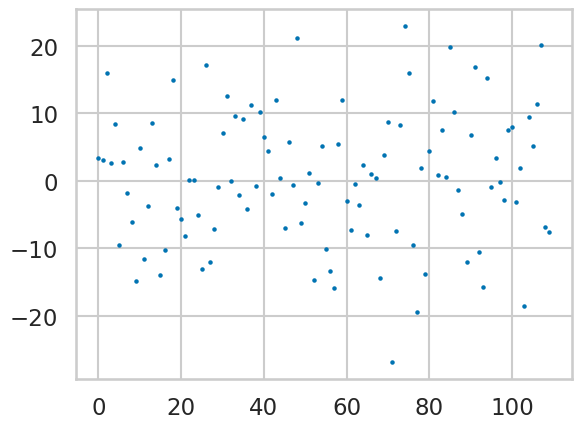

In [6]:


x = df_vacuum

#time series
#plt.plot(df_me2["Dihedral 1"], label="Dihedral 1")
plt.scatter(range(len(x["Dihedral 1"])), x["Dihedral 1"], label="Dihedral 2", s=3)

In [7]:
len(df_me2["Dihedral 1"])

1100

In [8]:

dih1_sel = u.select_atoms('bynum %d' % int(dih1[0]))
dih2_sel = u.select_atoms('bynum %d' % int(dih2[0]))
for i in range(1, len(dih1)):
    dih1_sel += u.select_atoms('bynum %d' % int(dih1[i]))
    dih2_sel += u.select_atoms('bynum %d' % int(dih2[i]))

print(dih2_sel)

<AtomGroup [<Atom 8: O1x of type O of resname UNK, resid 1 and segid A and altLoc >, <Atom 7: C7x of type C of resname UNK, resid 1 and segid A and altLoc >, <Atom 5: C5x of type C of resname UNK, resid 1 and segid A and altLoc >, <Atom 4: C4x of type C of resname UNK, resid 1 and segid A and altLoc >]>


In [9]:
for atom in u.atoms:
    print(atom.index, atom.resid, atom.name)

0 1 C1x
1 1 C2x
2 1 C3x
3 1 C4x
4 1 C5x
5 1 C6x
6 1 C7x
7 1 O1x
8 1 O2x
9 1 H1x
10 1 H2x
11 1 H3x
12 1 H4x
13 1 H5x
14 1 H6x
15 1 O1x
16 1 H1x
17 1 H2x
18 1 O1x
19 1 H1x
20 1 H2x
21 1 O1x
22 1 H1x
23 1 H2x
24 1 O1x
25 1 H1x
26 1 H2x
27 1 O1x
28 1 H1x
29 1 H2x
30 1 O1x
31 1 H1x
32 1 H2x
33 1 O1x
34 1 H1x
35 1 H2x
36 1 O1x
37 1 H1x
38 1 H2x
39 1 O1x
40 1 H1x
41 1 H2x
42 1 O1x
43 1 H1x
44 1 H2x
45 1 O1x
46 1 H1x
47 1 H2x
48 1 O1x
49 1 H1x
50 1 H2x
51 1 O1x
52 1 H1x
53 1 H2x
54 1 O1x
55 1 H1x
56 1 H2x
57 1 O1x
58 1 H1x
59 1 H2x
60 1 O1x
61 1 H1x
62 1 H2x
63 1 O1x
64 1 H1x
65 1 H2x
66 1 O1x
67 1 H1x
68 1 H2x
69 1 O1x
70 1 H1x
71 1 H2x
72 1 O1x
73 1 H1x
74 1 H2x
75 1 O1x
76 1 H1x
77 1 H2x
78 1 O1x
79 1 H1x
80 1 H2x
81 1 O1x
82 1 H1x
83 1 H2x
84 1 O1x
85 1 H1x
86 1 H2x
87 1 O1x
88 1 H1x
89 1 H2x
90 1 O1x
91 1 H1x
92 1 H2x
93 1 O1x
94 1 H1x
95 1 H2x
96 1 O1x
97 1 H1x
98 1 H2x
99 1 O1x
100 1 H1x
101 1 H2x
102 1 O1x
103 1 H1x
104 1 H2x
105 1 O1x
106 1 H1x
107 1 H2x
108 1 O1x
109 1 H1x
110 1 H2x
